In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
T3_df = pd.read_csv(
    "/Volumes/mgriffit/Active/griffithlab/gc2596/lisa_jingtao/jobs/mapped_TALON/TALON_results_and_analysis/T3_Analysis/T3_abundance_postfilter_talon_abundance_filtered.tsv",
    sep="\t")
T3_df.head()

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype,SMRTcell1_long_read_rna_mapped-1
0,32,45,ENSMUSG00000033845.14,ENSMUST00000130201.8,Mrpl15,Mrpl15-203,5,1894,Known,Known,NaN,5
1,32,46,ENSMUSG00000033845.14,ENSMUST00000156816.7,Mrpl15,Mrpl15-206,5,4203,Known,Known,NaN,11
2,32,49,ENSMUSG00000033845.14,ENSMUST00000192286.2,Mrpl15,Mrpl15-207,1,4600,Known,Known,NaN,3
3,32,50,ENSMUSG00000033845.14,ENSMUST00000146665.3,Mrpl15,Mrpl15-205,4,1569,Known,Known,NaN,4
4,34,54,ENSMUSG00000025903.15,ENSMUST00000027036.11,Lypla1,Lypla1-201,9,2507,Known,Known,NaN,16


In [70]:
 df = T3_df.copy()

# Filter to novel transcripts
df_novel = df[df['transcript_novelty'] != "Known"]

# Separate ISM vs non-ISM
df_ism = df_novel[df_novel['transcript_novelty'] == "ISM"]
df_ism.head()

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype,SMRTcell1_long_read_rna_mapped-1
29341,10136,142449,ENSMUSG00000028232.14,TALONT000142449,Tmem68,TALONT000142449,7,2338,Known,ISM,Suffix,7
29345,3448,142631,ENSMUSG00000050530.15,TALONT000142631,Fam171a1,TALONT000142631,1,2435,Known,ISM,NaN,41
29346,34,142638,ENSMUSG00000025903.15,TALONT000142638,Lypla1,TALONT000142638,1,1777,Known,ISM,NaN,10
29348,3449,142784,ENSMUSG00000026643.17,TALONT000142784,Nmt2,TALONT000142784,12,2423,Known,ISM,Suffix,8
29349,10137,142824,ENSMUSG00000028233.7,TALONT000142824,Tgs1,TALONT000142824,10,3832,Known,ISM,Suffix,9


In [71]:
df_other = df_novel[df_novel['transcript_novelty'] != "ISM"]
df_other.head()

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype,SMRTcell1_long_read_rna_mapped-1
29340,55371,142391,TALONG000055371,TALONT000142391,TALONG000055371,TALONT000142391,1,2370,Antisense,Antisense,NaN,12
29342,55383,142490,TALONG000055383,TALONT000142490,TALONG000055383,TALONT000142490,4,1531,Antisense,NNC,NaN,7
29343,7266,142538,ENSMUSG00000040374.14,TALONT000142538,Pex2,TALONT000142538,4,4352,Known,NIC,NaN,14
29344,12997,142562,ENSMUSG00000040274.12,TALONT000142562,Cdk6,TALONT000142562,8,3747,Known,NIC,NaN,29
29347,36,142661,ENSMUSG00000033813.16,TALONT000142661,Tcea1,TALONT000142661,10,2544,Known,NNC,NaN,8


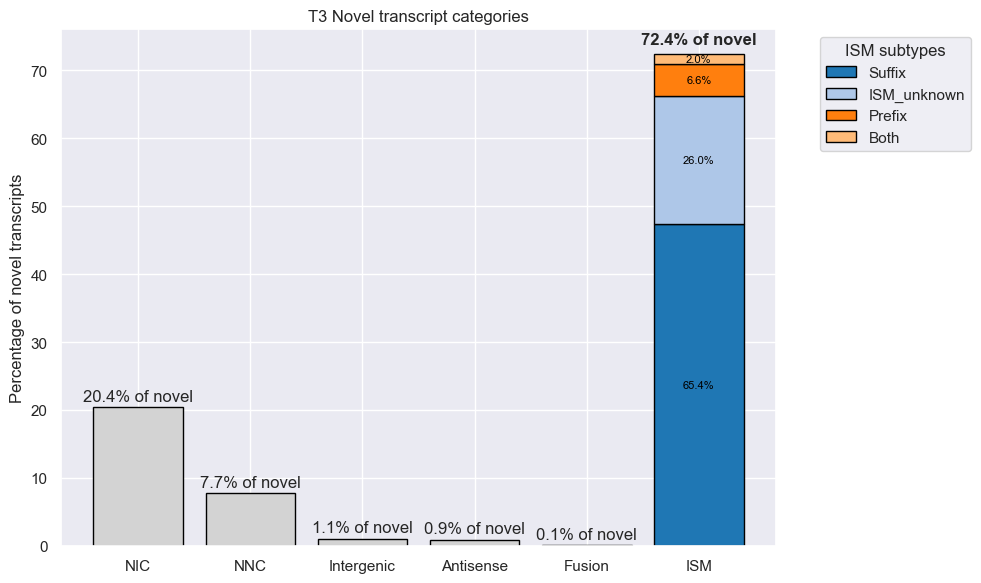

In [92]:
# Count non-ISM categories
counts_other = df_other['transcript_novelty'].value_counts()

# Count ISM subtypes including NaNs
ism_sub_counts = df_ism['ISM_subtype'].value_counts(dropna=False)

# Replace NaN label
ism_sub_counts.index = [
    str(x) if pd.notna(x) else 'ISM_unknown' for x in ism_sub_counts.index
]

# Compute percentages relative to all novel transcripts
N_novel = len(df_novel)
perc_other = counts_other / N_novel * 100
perc_ism_total = ism_sub_counts.sum() / N_novel * 100
perc_ism_sub = ism_sub_counts / ism_sub_counts.sum() * 100


fig, ax = plt.subplots(figsize=(10,6))

# non-ISM bars
bars_other = ax.bar(
    perc_other.index,
    perc_other.values,
    color='lightgray',
    edgecolor='black'
)
for bar, pct in zip(bars_other, perc_other.values):
    ax.text(bar.get_x() + bar.get_width()/2,
            pct + 0.5,
            f"{pct:.1f}% of novel",
            ha='center', va='bottom', fontsize=12)

# ISM stacked bar
bottom = 0
colors = plt.cm.tab20.colors
for i, (subtype, sub_pct_of_ism) in enumerate(perc_ism_sub.items()):
    height = perc_ism_total * (sub_pct_of_ism / 100)
    bar = ax.bar(
        "ISM",
        height,
        bottom=bottom,
        color=colors[i % len(colors)],
        edgecolor='black',
        label=subtype
    )
    ax.text(
        "ISM",
        bottom + height/2,
        f"{sub_pct_of_ism:.1f}%",
        ha='center', va='center', fontsize=8, color='black'
    )
    bottom += height

# Label total ISM bar
ax.text("ISM", perc_ism_total + 1, f"{perc_ism_total:.1f}% of novel", ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Percentage of novel transcripts")
ax.set_title("T3 Novel transcript categories")
ax.legend(title="ISM subtypes", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
T3_fixed_df = pd.read_csv(
    "/Volumes/mgriffit/Active/griffithlab/gc2596/lisa_jingtao/jobs/mapped_TALON/TALON_results_and_analysis/T3_fixed_Analysis/T3_fixed_abundance_filtered_talon_abundance_filtered.tsv",
    sep="\t")


In [89]:
df_fixed = T3_fixed_df.copy()

# Filter to novel transcripts
fixed_df_novel = df_fixed[df_fixed['transcript_novelty'] != "Known"]

# Separate ISM vs non-ISM
df_fixed_ism = fixed_df_novel[fixed_df_novel['transcript_novelty'] == "ISM"]
df_fixed_ism.head()

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype,SMRTcell1_long_read_rna_mapped-2
29018,10136,142547,ENSMUSG00000028232.14,TALONT000142547,Tmem68,TALONT000142547,7,2534,Known,ISM,Suffix,6
29020,3448,142629,ENSMUSG00000050530.15,TALONT000142629,Fam171a1,TALONT000142629,1,2989,Known,ISM,NaN,37
29021,7282,142656,ENSMUSG00000027499.13,TALONT000142656,Pkia,TALONT000142656,1,3356,Known,ISM,NaN,14
29022,34,142657,ENSMUSG00000025903.15,TALONT000142657,Lypla1,TALONT000142657,1,1777,Known,ISM,NaN,10
29023,36,142662,ENSMUSG00000033813.16,TALONT000142662,Tcea1,TALONT000142662,6,623,Known,ISM,Prefix,5


In [90]:
df_fixed_other = fixed_df_novel[fixed_df_novel['transcript_novelty'] != "ISM"]
df_fixed_other.head()

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype,SMRTcell1_long_read_rna_mapped-2
29016,55363,142393,TALONG000055363,TALONT000142393,TALONG000055363,TALONT000142393,1,2521,Antisense,Antisense,NaN,19
29017,7266,142519,ENSMUSG00000040374.14,TALONT000142519,Pex2,TALONT000142519,4,2787,Known,NIC,NaN,8
29019,12997,142554,ENSMUSG00000040274.12,TALONT000142554,Cdk6,TALONT000142554,8,3746,Known,NIC,NaN,17
29024,36,142673,ENSMUSG00000033813.16,TALONT000142673,Tcea1,TALONT000142673,9,2721,Known,NIC,NaN,6
29025,7286,142680,ENSMUSG00000043542.13,TALONT000142680,Zc2hc1a,TALONT000142680,10,1648,Known,NNC,NaN,8


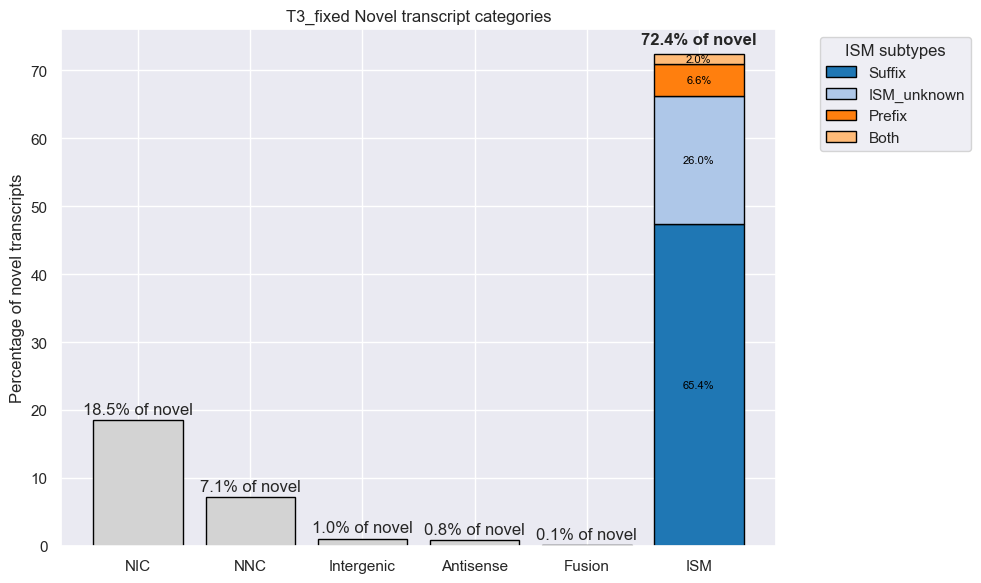

In [93]:
# Count non-ISM categories
counts_fixed_other = df_fixed_other['transcript_novelty'].value_counts()

# Count ISM subtypes including NaNs
ism_sub_counts_fixed = df_fixed_ism['ISM_subtype'].value_counts(dropna=False)

# Replace NaN label
ism_sub_counts_fixed.index = [
    str(x) if pd.notna(x) else 'ISM_unknown' for x in ism_sub_counts_fixed.index
]

# Compute percentages relative to all novel transcripts
N_fixed_novel = len(fixed_df_novel)
perc_other_fixed = counts_fixed_other / N_fixed_novel * 100
perc_ism_total_fixed = ism_sub_counts_fixed.sum() / N_fixed_novel * 100
perc_ism_sub_fixed = ism_sub_counts_fixed / ism_sub_counts_fixed.sum() * 100


fig, ax = plt.subplots(figsize=(10,6))

# non-ISM bars
bars_other = ax.bar(
    perc_other_fixed.index,
    perc_other_fixed.values,
    color='lightgray',
    edgecolor='black'
)
for bar, pct in zip(bars_other, perc_other_fixed.values):
    ax.text(bar.get_x() + bar.get_width()/2,
            pct + 0.5,
            f"{pct:.1f}% of novel",
            ha='center', va='bottom', fontsize=12)

# ISM stacked bar
bottom = 0
colors = plt.cm.tab20.colors
for i, (subtype, sub_pct_of_ism) in enumerate(perc_ism_sub_fixed.items()):
    height = perc_ism_total * (sub_pct_of_ism / 100)
    bar = ax.bar(
        "ISM",
        height,
        bottom=bottom,
        color=colors[i % len(colors)],
        edgecolor='black',
        label=subtype
    )
    ax.text(
        "ISM",
        bottom + height/2,
        f"{sub_pct_of_ism:.1f}%",
        ha='center', va='center', fontsize=8, color='black'
    )
    bottom += height

# Label total ISM bar
ax.text("ISM", perc_ism_total_fixed + 1, f"{perc_ism_total_fixed:.1f}% of novel", ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Percentage of novel transcripts")
ax.set_title("T3_fixed Novel transcript categories")
ax.legend(title="ISM subtypes", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()